# Cuerda atada 

Usamos FDTD para solucionar el problema de la cuerda atada, en este problema, la ecuación de onda es

$$\dfrac{\partial^2 u}{\partial z^2}=\dfrac{1}{c^2}\dfrac{\partial^2 u}{\partial t^2} $$


Aplicando diferencias centrales para la segunda derivada como se calcula en [el apunte anterior](01_Diferencias_finitas.ipynb#section_id2), tenemos que

$$\dfrac{\partial^2 u}{\partial z^2}=4\dfrac{u^{n+1}_k+u^{n-1}_k-2u^n_k}{\Delta z^2}=\dfrac{4}{c^2}\dfrac{u^{n}_{k+1}+u^{n}_{k-1}-2u^n_k}{\Delta t^2} $$

Despejando para el paso $u^{n+1}_k$ que es el de interés para ver la evolución del sistema,

## $$u^{n+1}_k=2u^n_k-u^{n-1}_k+\dfrac{c^2\Delta t^2}{\Delta z^2}\left(u^{n}_{k+1}+u^{n}_{k-1}-2u^n_k\right) $$


donde el dominio de $z$ se discretiza como $$z=[0,dz,2dz,...,N*dz]=[k=0,k=1,...,k=N]; dz=L/N$$
y el dominio temporal $t$ se discretiza como

$$t=[0,dt,2*dt,...,n*dt]=[n=0,n=1,...,n=N] , dt=dz/c $$

 Nuestras condiciones iniciales y de contorno son 

 $$u(z,0)=f(z), \forall z$$
 
$$u(0,t)=0, \forall t $$

$$u(L,t)=0, \forall t $$

$$\dfrac{\partial u}{\partial t}\Big|_{t=0}=g(z) $$

En particular, si $f(z)=E_0\sin(z)$ y $g(z)=0$, tendremos una cuerda que vibra atada en sus extremos.


Hay dos problemas con la ecuación en diferencias, pues para $n=1$, calculamos $u^{2}_k$ usando $u^1_k$ y $u^0_k$, pero solo tenemos como condiciones de frontera e iniciales a $u^0_k=f_k$ que es equivalente a $u(z,0)=f(z)$. Así que empezamos en $n=0$, pero esto implicaría calcular $n=-1$ que es salirse del dominio temporal. Para solucionar esto, nos fijamos en la diferencia central para la primer derivada temporal, y la evaluamos en tiempo 0, siempre que estemos en puntos distintos de $z=0, z=L$ pues ahi se anula la dependencia en t,

$$\dfrac{\partial u}{\partial t}\Big|_{t=0} = \dfrac{u^{n+1}_k-u^{n-1}_k}{\Delta t}\Big|_{t=0}=\dfrac{u^{1}_k-u^{-1}_k}{2\Delta t}=g(z) \implies u^{-1}_k=u^{1}_k-2g(z)\Delta z; \forall k \neq 0, N $$

por lo tanto, para $n=0$,

$$u^{1}_k=-u^{-1}_k+2u^0_k+C^2\left(u^{0}_{k+1}+u^{0}_{k-1}-2u^0_k\right) \implies u^{1}_k=g(z)\Delta z+u^0_k+\dfrac{C^2}{2}\left(u^{0}_{k+1}+u^{0}_{k-1}-2u^0_k\right) $$

con $C\equiv \dfrac{c\Delta t}{\Delta z}$

<IPython.core.display.Javascript object>


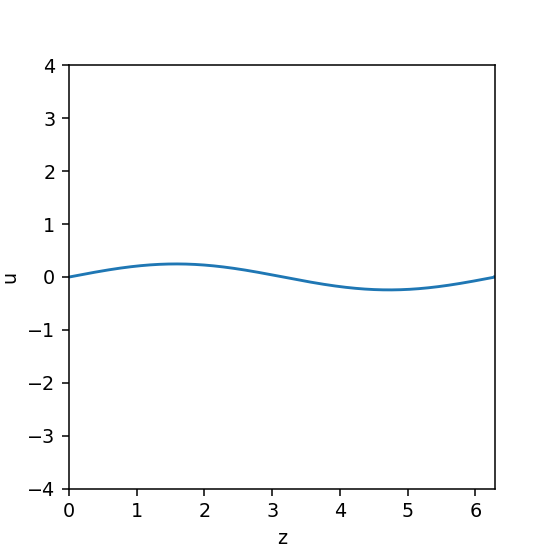

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

%matplotlib notebook

c=3
L=0.05
u_0=1

tau=L/c #periodo
omega=2*np.pi/tau


dz=L/100
dt=0.5*dz/c
C=c*dt/dz

z=np.arange(-0.1,2*np.pi,dz)
t=np.arange(0,tau,dt)
u=np.zeros((len(z),len(t)))
f_z=u_0*np.sin(z)
g_z=np.zeros(len(z))

u[:,0]=f_z
u[0,:]=0
u[-1,:]=0

############Condicion especial
for i in range(1,len(z)-1):
    u[i,1]=g_z[i]*dz+u[i,0]+((C**2)/2)*(u[i+1,0]+u[i-1,0]-2*u[i,0])

###### FDTD    
for i in range(1,len(z)-1):
    for j in range(1,len(t)-2):
        u[i,j+1]=-u[i,j-1]+2*u[i,j]+C**2*(u[i+1,j]-2*u[i,j]+u[i-1,j])
    

    
fig=plt.figure(0,figsize=(4,4))

def animate(i):
    plt.cla()
    plt.plot(z, u[:,i])
    plt.xlim(0,2*np.pi)
    plt.ylim(-4,4)
    plt.xlabel('z')
    plt.ylabel(r'u')
    
anim1=matplotlib.animation.FuncAnimation(fig, animate, frames=100, interval=60)


<IPython.core.display.Javascript object>


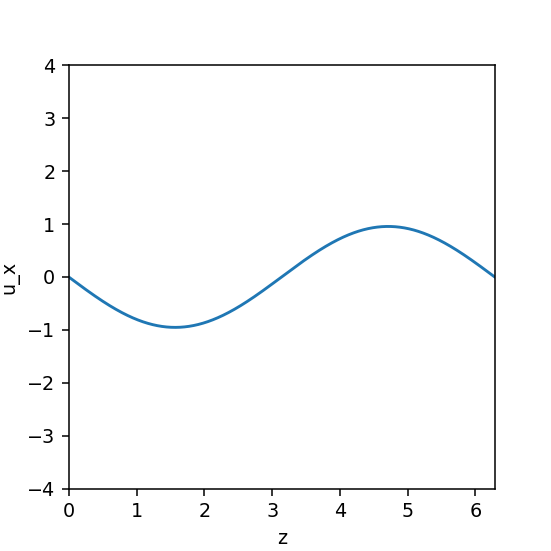

In [210]:
from numba import njit


c=3
L=0.05
n=100 
u_0=1

tau=L/c #periodo
omega=2*np.pi/tau


dz=L/n
dt=0.4*dz/c
C=c*dt/dz

z=np.arange(-0.1,2*np.pi,dz)
t=np.arange(0,tau,dt)
u=np.zeros((len(z),len(t)))

f_z=u_0*np.sin(z)
g_z=np.zeros(len(z))

u[:,0]=f_z
u[0,:]=0
u[-1,:]=0

############Condicion especial
for i in range(1,len(z)-1):
    u[i,1]=g_z[i]*dz+u[i,0]+((C**2)/2)*(u[i+1,0]+u[i-1,0]-2*u[i,0])

###### FDTD
@njit('f8[:,:](f8[:],f8[:,:])', nogil=True)
def h(z,u):
    for i in range(1,len(z)-1):
        for j in range(1,len(t)-2):
            u[i,j+1]=-u[i,j-1]+2*u[i,j]+(C**2)*(u[i+1,j]+u[i-1,j]-2*u[i,j])
    return u

    
fig=plt.figure(1,figsize=(4,4))

u=h(z,u)

def animate2(i):
    plt.cla()
    plt.plot(z, u[:,i])
    plt.xlim(0,2*np.pi)
    plt.ylim(-4,4)
    plt.xlabel('z')
    plt.ylabel(r'u_x')
    
anim2=matplotlib.animation.FuncAnimation(fig, animate2, frames=100, interval=30)

# Cuerda con amortiguamiento

La ecuación diferencial para una onda amortiguada está dada por
$$\dfrac{\partial^2 u}{\partial t^2}=-\beta \dfrac{\partial u}{\partial t}+c^2\dfrac{\partial^2 u}{\partial z^2}  $$

expresando ambos lados de la ecuación en su forma en diferencias finitas, 

$$\dfrac{u^{n+1}_k+u^{n-1}_k-2u^n_k}{\Delta t^2} = -\beta \dfrac{u^{n+1}_{k}-u^{n-1}_{k}}{2\Delta t}+c^2\dfrac{u^n_{k+1}+u^{n}_{k-1} }{\Delta z^2}$$


despejando para $u^{n+1}_k$,

## $$\boxed{ u^{n+1}_k=\dfrac{1}{1+\alpha}\left((\alpha-1)u^{n-1}_k+2u^{n}_k+C^2(u_{k+1}^n+u_{k-1}^n-2u^n_k) \right)  }$$

con $C\equiv \dfrac{c\Delta t}{\Delta z}, \alpha \equiv \dfrac{\beta \Delta t}{2}$. 

De nueva cuenta, para determinar $u^1_k$, aplicamos la condición de frontera de la derivada. Si suponemos que nuestra función $u$ es de la forma $u=ve^{-\beta t}$, donde $v$ cumple la ec. de onda y las condiciones de frontera de la cuerda atada a los extremos, entonces

$$u(z,0)=v(z,0)=f(z) $$

$$u(0,t)=v(0,t)e^{-\beta t}=0 $$

$$u(L,t)=v(L,t)e^{-\beta t}=0 $$

$$\dfrac{\partial u}{\partial t}\Bigg|_{t=0}=(-\beta v(z,t)e^{-\beta t})\Bigg|_{t=0}+(e^{-\beta t}\dfrac{\partial v}{\partial t})\Bigg|_{t=0} = -\beta v(z,0)+\dfrac{\partial v}{\partial t}\Bigg|_{t=0}=-\beta f(z)+g(z)$$

Por otro lado, la parcial en términos de su diferencia finita es

$$\dfrac{\partial u}{\partial t}\Bigg|_{t=0}=\dfrac{u^{1}_k-u^{-1}_k}{2\Delta t}=-\beta f(z)+g(z) \implies u^{-1}_k=2\Delta t (\beta f(z)-g(z))+u^1_k$$

por lo tanto, para $n=0$,

$$u^{1}_k=\dfrac{1}{1+\alpha}\left((\alpha-1)u^{-1}_k+2u^{0}_k+C^2(u_{k+1}^0+u_{k-1}^0-2u^0_k) \right) \implies$$
$$u^{1}_k=\dfrac{1}{2}\left[(\alpha-1)(4\alpha f(x)-2\Delta z g(z))+2u^{0}_k+C^2(u_{k+1}^0+u_{k-1}^0-2u^0_k) \right]$$

<IPython.core.display.Javascript object>


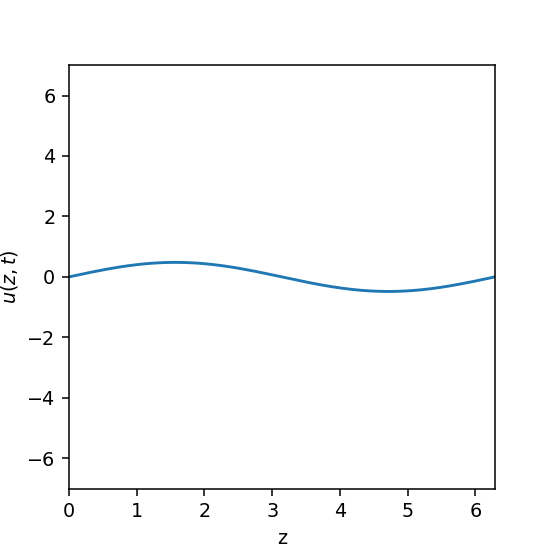

In [219]:
c=3e-2
L=0.05
n=100 
u_0=1
beta=5

tau=L/c #periodo
omega=2*np.pi/tau


dz=L/n
dt=0.4*dz/c
C=c*dt/dz

alpha=beta*dt/2


z=np.arange(-0.1,2*np.pi,dz)
t=np.arange(0,tau,dt)
u=np.zeros((len(z),len(t)))

f_z=u_0*np.sin(z)
g_z=np.zeros(len(z))

###########condiciones iniciales y de frontera

u[:,0]=f_z
u[0,:]=0
u[-1,:]=0

############Condicion especial
for i in range(1,len(z)-1):
    u[i,1]=0.5*( (alpha-1)*(4*alpha*f_z[i])+2*u[i,0]+(C**2)*(u[i+1,0]+u[i-1,0]-2*u[i,0]) )

###### FDTD
@njit('f8[:,:](f8[:],f8[:,:])', nogil=True)
def h(z, u):
    u=u.copy()
    for i in range(1,len(z)-1):
        for j in range(1,len(t)-2):
            u[i,j+1]=(1/(1+alpha))*( (alpha-1)*u[i,j-1]+2*u[i,j]+(C**2)*(u[i+1,j]+u[i-1,j]-2*u[i,j])  )
    return u

############ grafica    
fig=plt.figure(2,figsize=(4,4))

U=h(z,u)

def animate3(i):
    plt.cla()
    plt.plot(z, U[:,i])
    plt.xlim(0,2*np.pi)
    plt.ylim(-4,4)
    plt.xlabel('z')
    plt.ylabel(r'$u(z,t)$')
    
anim3=matplotlib.animation.FuncAnimation(fig, animate3, frames=50, interval=30)

# Cuerda forzada

es lo mismo que amortiguada pero con $\beta<0$.

<IPython.core.display.Javascript object>


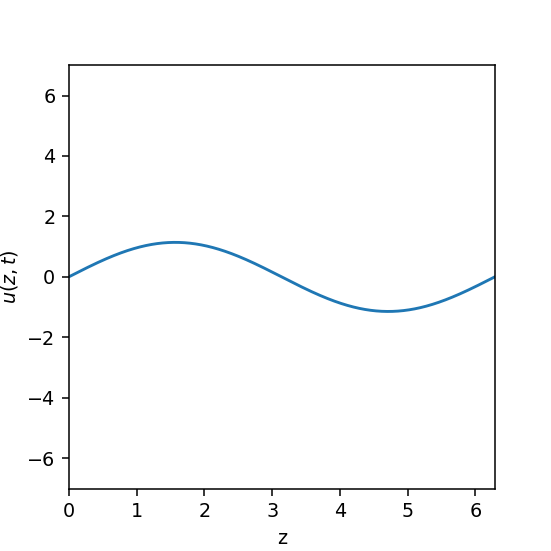

In [222]:
beta=-10
alpha=beta*dt/2


z=np.arange(-0.1,2*np.pi,dz)
t=np.arange(0,tau,dt)
u=np.zeros((len(z),len(t)))

f_z=u_0*np.sin(z)
g_z=np.zeros(len(z))



u[:,0]=f_z
u[0,:]=0
u[-1,:]=0

for i in range(1,len(z)-1):
    u[i,1]=0.5*( (alpha-1)*(4*alpha*f_z[i])+2*u[i,0]+(C**2)*(u[i+1,0]+u[i-1,0]-2*u[i,0]) )

###### FDTD
@njit('f8[:,:](f8[:],f8[:,:])', nogil=True)
def h(z, u):
    u=u.copy()
    for i in range(1,len(z)-1):
        for j in range(1,len(t)-2):
            u[i,j+1]=(1/(1+alpha))*( (alpha-1)*u[i,j-1]+2*u[i,j]+(C**2)*(u[i+1,j]+u[i-1,j]-2*u[i,j])  )
    return u

############ grafica    
fig=plt.figure(3,figsize=(4,4))

U=h(z,u)

def animate4(i):
    plt.cla()
    plt.plot(z, U[:,i])
    plt.xlim(0,2*np.pi)
    plt.ylim(-7,7)
    plt.xlabel('z')
    plt.ylabel(r'$u(z,t)$')
    
anim3=matplotlib.animation.FuncAnimation(fig, animate4, frames=60, interval=30)